# Gradient descent

Gradient descent is a method to minimise a function $f:\mathbb R^n\to\mathbb R$. While in general gradient descent is not guaranteed to converge towards a global minimum, it works quite well in machine learning. (Or rather, variants of it.)

**gradient descent**
1. set $t=1$
2. **while** stopping criterion not satisfied **do**
3. $\quad$ compute $\nabla f(x^{(t)})$
4. $\quad$ compute learning rate $\eta_t$
5. $\quad$ set $x^{(t+1)}=x^{(t)}-\eta_t\nabla f(x^{(t)})$
6. $\quad$ set $t=t+1$
7. **end while**
8. output $x^{(t-1)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from matplotlib import ticker, cm
import math
import random

## The gradient

Let's look at a function, namely $$f:(x,y)\mapsto \tfrac{1}{2}(x^2+10y^2)-\tfrac{1}{10}e^{\frac{3}{10}(2x-y)}$$
and its gradient. What is the gradient again? For a function $f$ of two variables $x,y$ it's:
$$
\nabla f=\begin{pmatrix}\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}\end{pmatrix}
$$

We first define the function and its gradient:

In [2]:
def fun2(X,Y):
    return 0.5*(X**2+10*Y**2)-0.1*math.e**(0.3*(2*X-Y))

def grad2(X,Y):
    return np.array([X-0.06*math.e**(0.3*(2*X-Y)),10*Y+0.03*math.e**(0.3*(2*X-Y))])

In [3]:
## convenience functions to plot the function and the gradient
## you can ignore the code
def draw_fun2():
    xmin,xmax,ymin,ymax=-10,10,-4,4
    N=100
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)
    z=fun2(X,Y)
    fig, ax = plt.subplots(figsize=(10,4))
    cs = ax.contourf(X, Y, z,cmap=plt.cm.Reds)

def draw_grad(x0,y0,eta=0.3,grad=grad2):
    dx,dy=eta*grad(x0,y0)
    plt.scatter([x0],[y0],c='b')
    plt.arrow(x0,y0,dx,dy,width=0.05,head_width=0.3,head_length=0.1,color='b',length_includes_head=True)    

The gradient always points in the direction of the steepest ascent. The length of the gradient indicates how steep the ascent is. Below, the gradient is scaled down, so that it better fits in the picture.

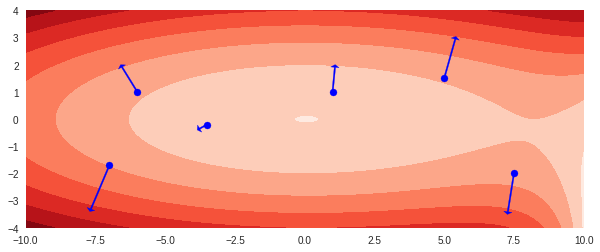

In [4]:
draw_fun2()
eta=0.1
points=[(1,1),(5,1.5),(-7,-1.7),(-3.5,-0.2),(-6,1),(7.5,-2)]
for px,py in points:
    draw_grad(px,py,eta=eta)

Because we want to minimise functions, we're not interested in which direction the function increases but where it decreases. We get this direction by simply taking the negative of the gradient. That is, $-\nabla f$ points in the direction of the steepest *descent*.

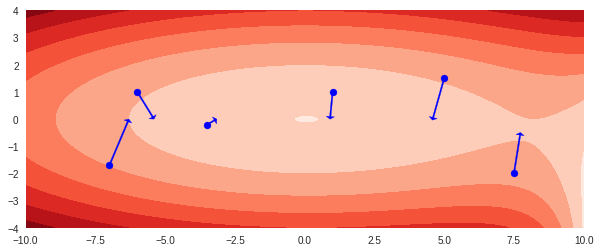

In [5]:
draw_fun2()
eta=-0.1
for px,py in points:
    draw_grad(px,py,eta=eta)

## Descent algorithm

The descent algorithm is very simple: start somewhere, compute the gradient at the current position, move in the opposite direction of the gradient and iterate. More precisely, we update as follows:
$$ x^{(t+1)}=x^{(t)}-\eta \nabla f(x^{(t)}),$$
where $\eta$ is the *learning rate*, a dampening factor that prevents overshooting the minimum. 

In [6]:
def gradient_descent(grad,x0,eta,steps=10):
    path=[x0]
    x=x0
    for i in range(steps):
        x=x-eta*grad(x)
        path.append(x)
    return np.array(path)

In [7]:
## convenience function to plot the function and the path of gradient descent
## again can be ignored
def plot_descent(xmin,xmax,ymin,ymax,fun,path,N=100,nbins='auto'):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)
    z=fun(X,Y)
    fig, ax = plt.subplots(figsize=(10,4))
    cs = ax.contourf(X, Y, z,cmap=cm.Reds,locator=ticker.MaxNLocator(nbins=nbins))
    if path is not None:
        ax.plot(path[:,0],path[:,1],"bo-")
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()

We first test gradient descent on a simple function with a single local minimum:
$$
f:(x,y)\mapsto \tfrac{1}{2}(x^2+10y^2)
$$
The gradient is 
$$
\nabla f(x,y)=\begin{pmatrix} x\\10y
\end{pmatrix}
$$

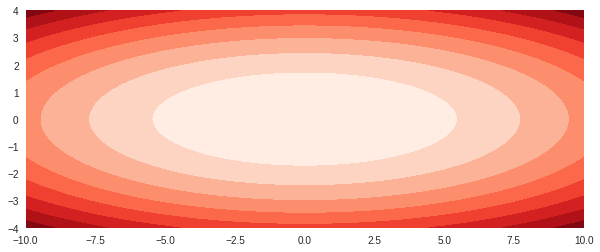

In [8]:
def fun1(X,Y):
    return 0.5*(X**2+10*Y**2)

def grad1(x):
    return np.array((x[0],10*x[1]))

plot_descent(-10,10,-4,4,fun1,None)

Let's do gradient descent with learning rate $\eta=0.18$, which will turn out to be a good learning rate.

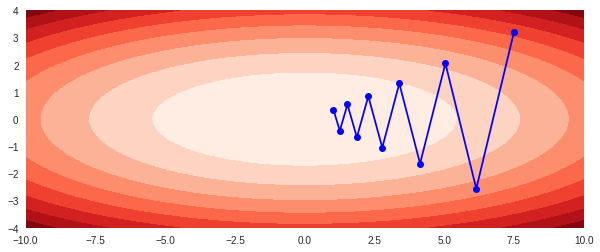

In [9]:
eta=0.18
x0=np.array((7.5,3.2))
path=gradient_descent(grad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path)

If the learning rate is too small, we have slow convergence:

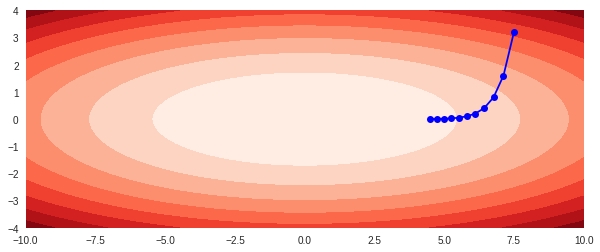

In [10]:
eta=0.05
x0=np.array((7.5,3.2))
path=gradient_descent(grad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path)

In contrast, if the learning rate is too large the algorithm might not converge at all.

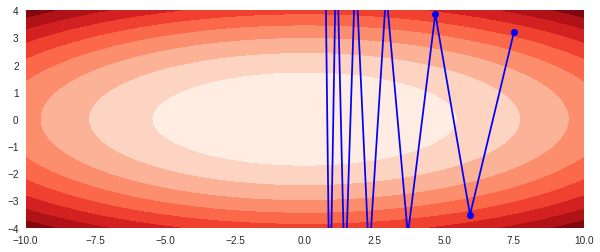

In [11]:
eta=0.21
x0=np.array((7.5,3.2))
path=gradient_descent(grad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path)

## More local mininma

We now investigate what happens if there is more than one local minimum. For this, consider the function
$$
f:(x,y)\mapsto \tfrac{1}{4}x^4+\tfrac{2}{3}x^3-\tfrac{15}{2}x^2+100y^2
$$

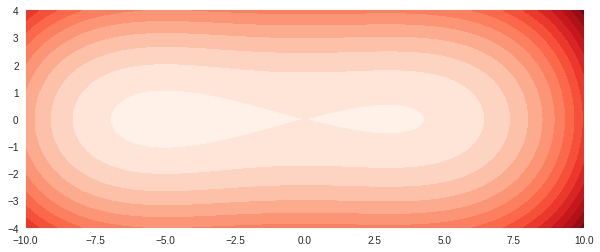

In [12]:
a,b,c=-5,0,3

def fun3(X,Y):
    return 0.25*X**4-(a+b+c)/3*X**3+0.5*(a*b+b*c+c*a)*X**2-a*b*c*X+100*Y**2

def grad3(x):
    return np.array(((x[0]-a)*(x[0]-b)*(x[0]-c),100*x[1]))

plot_descent(-10,10,-4,4,fun3,None,nbins=15)

If the initial point is located on the right, we have convergence to the right local minimum.

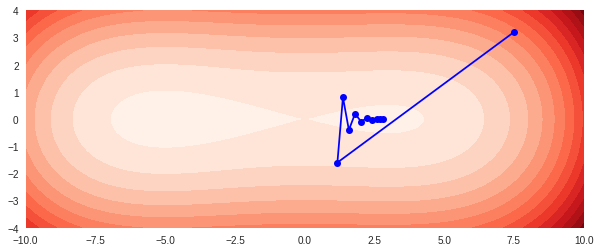

In [13]:
eta=0.015
x0=np.array((7.5,3.2))
path=gradient_descent(grad3,x0,eta)
plot_descent(-10,10,-4,4,fun3,path,nbins=15)

If, however, the initial point is on the left, we find that the algorithm converges to the other local minimum. Once the algorithm is close to the local minimum, it will converge to it, even if it is not the global minimum. In this way, gradient descent can get *trapped* by a local minimum.

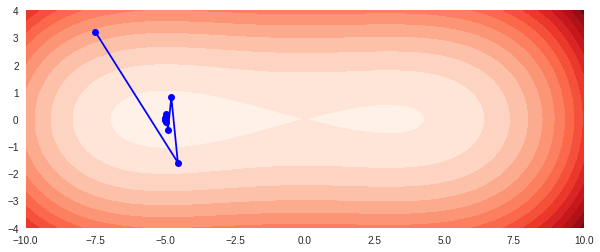

In [14]:
eta=0.015
x0=np.array((-7.5,3.2))
path=gradient_descent(grad3,x0,eta)
plot_descent(-10,10,-4,4,fun3,path,nbins=15)

## Shrinking learning rate

So far the learning rates have been constant. A learning rate that shrinks in the process of the algorithm can lead to much faster convergence. Large initial learning rate help the algorithm to make fast progress towards the minimum, while a smaller learning rate in the later stages of the algorithm prevents overshooting and divergence.

We try here *exponential scheduling*: in iteration $t$ the learning rate is set to
$$
\eta_t=\eta_0\cdot 0.9^t
$$

In the code below you'll see a <code>lambda</code> function. That is an anonymous function. It works as follows: <code>lambda argument : return_value</code>. For instance, let's define a lambda function that simple doubles the argument:

In [15]:
f=lambda x : 2*x

## let's try it out
f(42)

84

We use a <code>lambda</code> function in a so called factory pattern: we input the starting learning rate $\eta_0$ and return the *function* $t\mapsto \eta_0\cdot 0.9^t$.

In [16]:
def etafun_factory(eta0):
    """exponential scheduling"""
    return lambda step:eta0*0.9**step

def gradient_descentX(grad,x0,etafun,steps=10):
    path=[x0]
    x=x0
    for i in range(steps):
        x=x-etafun(i)*grad(x)
        path.append(x)
    return np.array(path)

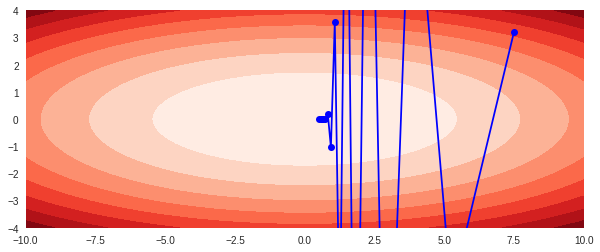

In [17]:
x0=np.array((7.5,3.2))
path=gradient_descentX(grad1,x0,etafun_factory(0.3),steps=15)
plot_descent(-10,10,-4,4,fun1,path)

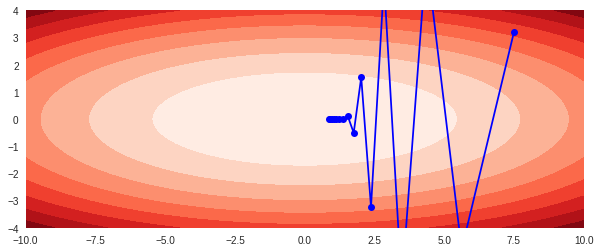

In [18]:
x0=np.array((7.5,3.2))
path=gradient_descentX(grad1,x0,etafun_factory(0.25),steps=15)
plot_descent(-10,10,-4,4,fun1,path)

## Logistic regression

Finally, let us apply gradient descent to logistic regression. We first generate a random instance.

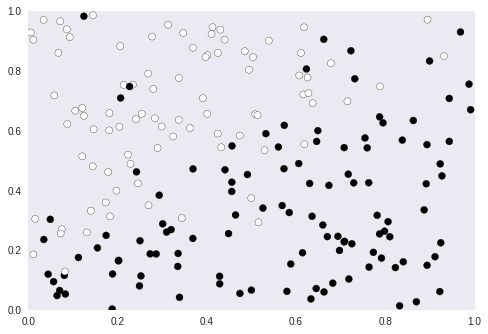

In [19]:
def logistic(z):
    return 1/(1+math.e**(-z))

def det_class(x):
    a,b=0.7,0.2
    d=a*x[0]+b-x[1]
    if random.random()<logistic(8*d):
        return 1
    return -1

def gen_samples(N):
    X=[(random.random(),random.random()) for i in range(N)]
    y=np.array([det_class(x) for x in X])
    X=np.array(X)
    return X,y

# generate data set, upper left -> class -1, lower right -> class 1

X,y=gen_samples(200)
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='k')
ax.grid(False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Next, we implement the logistic loss function as well as the gradient of logistic loss. Recall that logistic loss is defined as
$$
L(w)=\frac{1}{|S|}\sum_{(x,y)\in S}-\log\left(\frac{1}{1+e^{-y(w^Tx+b)}}\right)
$$
Note that we perform logistic regression with a bias term $b$.

In [20]:
def aff_fun(W,x):
    """returns sum W_ix_i+b, where b is the last entry of W"""
    return sum(W[:-1]*x)+W[-1]

# given data set, return logistic loss by weight vector
def log_reg_factory(X,y):
    def log_reg_loss(W):
        return 1/len(X)*sum([-math.log(logistic(y[i]*aff_fun(W,X[i,:])),2) for i in range(len(X))])
    return log_reg_loss

# given data set, return gradient of logistic loss 
def log_reg_grad_factory(X,y):
    def log_reg_grad(W):
        g0=sum([ -y[i]*X[i,0]*logistic(-y[i]*aff_fun(W,X[i,:])) for i in range(len(X)) ])
        g1=sum([ -y[i]*X[i,1]*logistic(-y[i]*aff_fun(W,X[i,:])) for i in range(len(X)) ])        
        g2=sum([ -y[i]*logistic(-y[i]*aff_fun(W,X[i,:])) for i in range(len(X)) ])
        return np.array([g0,g1,g2])/len(X)/math.log(2) 
    return log_reg_grad

loss=log_reg_factory(X,y)
loss([1,2,3])

2.949136797977951

To illustrate what the algorithm is doing, we implement a method that shows the current classification boundary, ie the affine function that sorts datapoints in to the two classes.

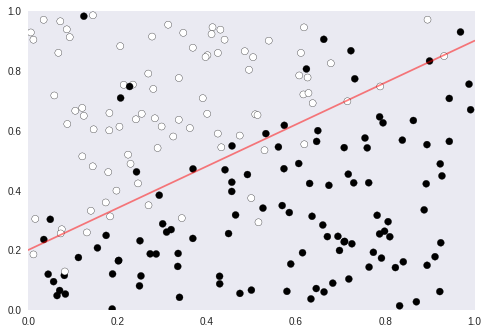

In [21]:
def plot_logreg_descent(X,y,path):
    fig, ax = plt.subplots()
    ax.grid(False)
    ax.scatter(X[:,0],X[:,1],c=y,edgecolor='k')
    XX=np.linspace(0,1,100)
    color="r-"  # we draw the first line in red
    for W in path:
        ax.plot(XX,-(W[0]*XX+W[2])/W[1],color,alpha=0.5)
        color="b-"  # all subsequent lines in blue
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.show()

path=[[0.7,-1,0.2]]
plot_logreg_descent(X,y,path)

We can use the exact same gradient descent method we defined earlier. 

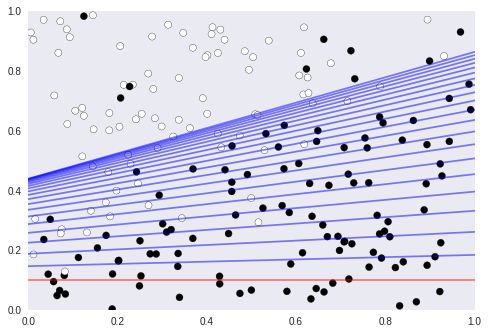

(array([ 0.49132011, -1.15849578,  0.50790874]), 0.8335029852282504)

In [22]:
W0=[0,-1,0.1]
eta=0.2
path=gradient_descent(log_reg_grad_factory(X,y),W0,eta,steps=20)
plot_logreg_descent(X,y,path)
path[-1],loss(path[-1])

The initial classification line (in red) was quite bad, but slowly the algorithm approaches towards the best classification line.

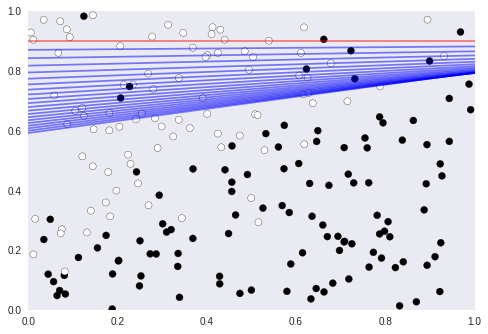

(array([ 0.27946329, -1.38165319,  0.81701754]), 0.8289416094923359)

In [23]:
W0=[0,-1,0.9]
eta=0.2
path=gradient_descent(log_reg_grad_factory(X,y),W0,eta,steps=20)
plot_logreg_descent(X,y,path)
path[-1],loss(path[-1])

Let's see what happens if we start with the worst possible line.

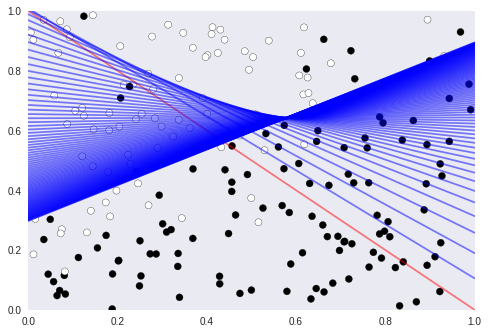

(array([ 2.18763805, -3.66381776,  1.08881902]), 0.6021900602266123)

In [24]:
W0=[-1,-1,1]
eta=0.5
path=gradient_descent(log_reg_grad_factory(X,y),W0,eta,steps=100)
plot_logreg_descent(X,y,path)
path[-1],loss(path[-1])

What we observe: initial progress is fast and then slows down considerably. Can you speed this up by choosing better learning rates?